In [2]:
import os
import mlflow
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from utils.tf_data_utils import build_data_pipeline, AUGMENTER

2024-04-11 15:37:20.920051: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 15:37:21.295327: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-11 15:37:21.295660: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-11 15:37:21.654168: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-11 15:37:24.071811: W tensorflow/stream_executor/platform/de

In [3]:
img_size = (224,224)
batch_size = 8

In [4]:
ds_repo_path = '/home/Jang/workspace/datasets/Animals10-dvc'
annotation_path = os.path.join(ds_repo_path, 'annotation_df.csv')
annotation_df = pd.read_csv(annotation_path)

In [5]:
classes = os.listdir(ds_repo_path+'/images/train')
classes

['cat',
 'butterfly',
 'dog',
 'sheep',
 'spider',
 'chicken',
 'horse',
 'squirrel',
 'cow',
 'elephant']

In [6]:
str(classes).replace("'",'"')

'["cat", "butterfly", "dog", "sheep", "spider", "chicken", "horse", "squirrel", "cow", "elephant"]'

In [7]:
train_ds = build_data_pipeline(annotation_df, classes, 'train', img_size, batch_size, 
                               do_augment=True, augmenter=AUGMENTER)
valid_ds = build_data_pipeline(annotation_df, classes, 'valid', img_size, batch_size, 
                               do_augment=False, augmenter=None)

2024-04-11 15:37:31.145288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda3/envs/jang/lib/python3.9/site-packages/cv2/../../lib64:
2024-04-11 15:37:31.145791: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-11 15:37:31.145996: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6e17c2cefe8f): /proc/driver/nvidia/version does not exist
2024-04-11 15:37:31.154109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
(train_x, train_y) = iter(train_ds.take(5)).next()
(train_x, train_y)

2024-04-11 15:37:34.161693: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency


(<tf.Tensor: shape=(8, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.14901961, 0.19215687, 0.07058824],
          [0.24313726, 0.28627452, 0.16078432],
          [0.32156864, 0.36862746, 0.23137255],
          ...,
          [0.        , 0.01176471, 0.        ],
          [0.        , 0.01176471, 0.        ],
          [0.00392157, 0.01176471, 0.        ]],
 
         [[0.18431373, 0.22745098, 0.10588235],
          [0.1882353 , 0.23137255, 0.10196079],
          [0.17254902, 0.21568628, 0.08235294],
          ...,
          [0.        , 0.01568628, 0.        ],
          [0.00392157, 0.01568628, 0.        ],
          [0.01176471, 0.01960784, 0.00392157]],
 
         [[0.18431373, 0.22745098, 0.10980392],
          [0.19607843, 0.23921569, 0.11372549],
          [0.18431373, 0.22745098, 0.09411765],
          ...,
          [0.        , 0.01960784, 0.        ],
          [0.00784314, 0.02352941, 0.00392157],
          [0.01960784, 0.03137255, 0.01176471]],
 
         ...,
 
       

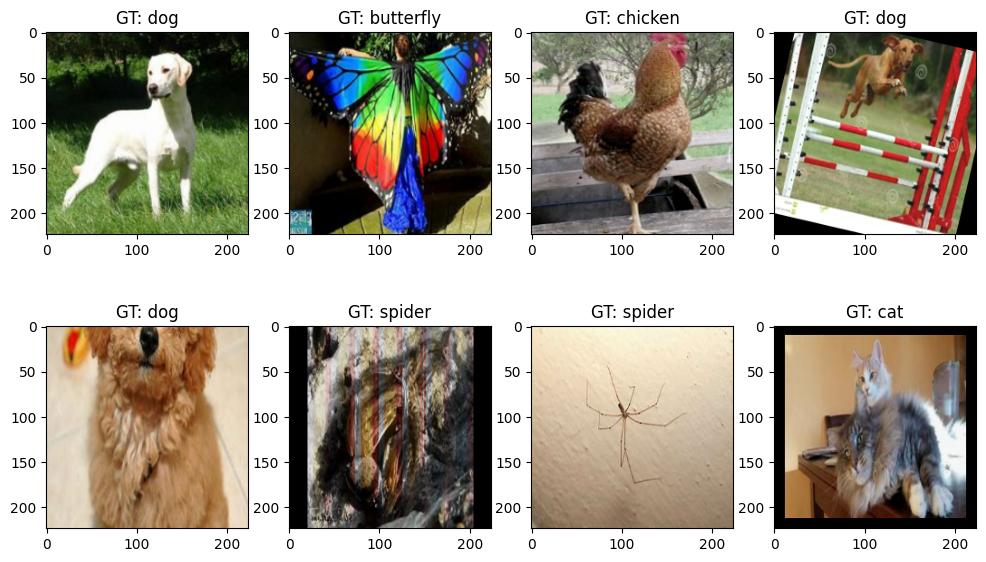

In [9]:
# plot all images in the batch
plt.figure(figsize=(12,7))
plt.tight_layout()
for idx in range(8):
    img = (train_x[idx]*255).numpy().astype(int)
    gt_idx = train_y[idx].numpy().argmax()
    plt.subplot(2, 4, idx+1)
    plt.imshow(img)
    plt.title(f'GT: {classes[gt_idx]}')
plt.show()

In [41]:
annotation_df.to_csv('/home/Jang/workspace/datasets/animals10-dvc/annotation_df.csv', index=False)

In [40]:
!pwd

/home/Jang/workspace/tasks


In [1]:
import numpy as np

print(np.__version__)


1.23.1
